In [ ]:
import pandas as pd
import numpy as np 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('Churn_Modelling_bank.csv')
df.sample(5)
df.shape

(10000, 14)

In [ ]:
df.drop('RowNumber',axis='columns',inplace=True)
df.drop('CustomerId',axis='columns',inplace=True)
df.drop('Surname',axis='columns',inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df['Geography'].unique()
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Geography'].replace({'France':2,'Spain':1,'Germany':0},inplace=True)
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [ ]:

df['Geography'].unique()
df['Gender'].unique()

array([1, 0])

In [ ]:
df.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4557,658,0,0,37,3,168735.74,2,0,0,70370.24,0
5865,663,2,0,39,4,0.00,1,1,0,76884.05,0
4219,543,0,1,25,1,146566.01,1,0,1,161407.48,0
5462,694,2,1,29,5,99713.87,1,0,0,112317.89,0
5465,647,0,1,41,1,85906.65,3,1,0,189159.97,0


DATA VISUALIZATION

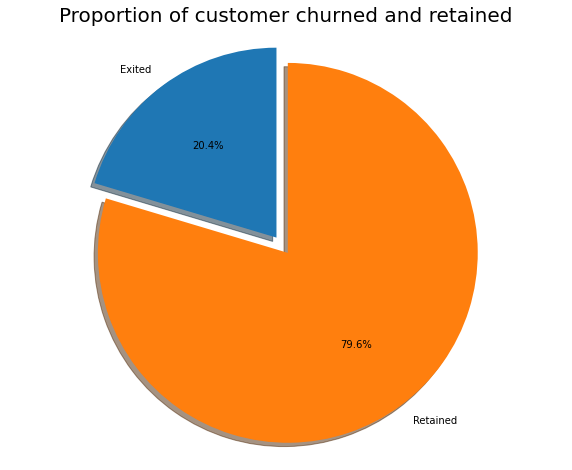

In [ ]:
labels='Exited','Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

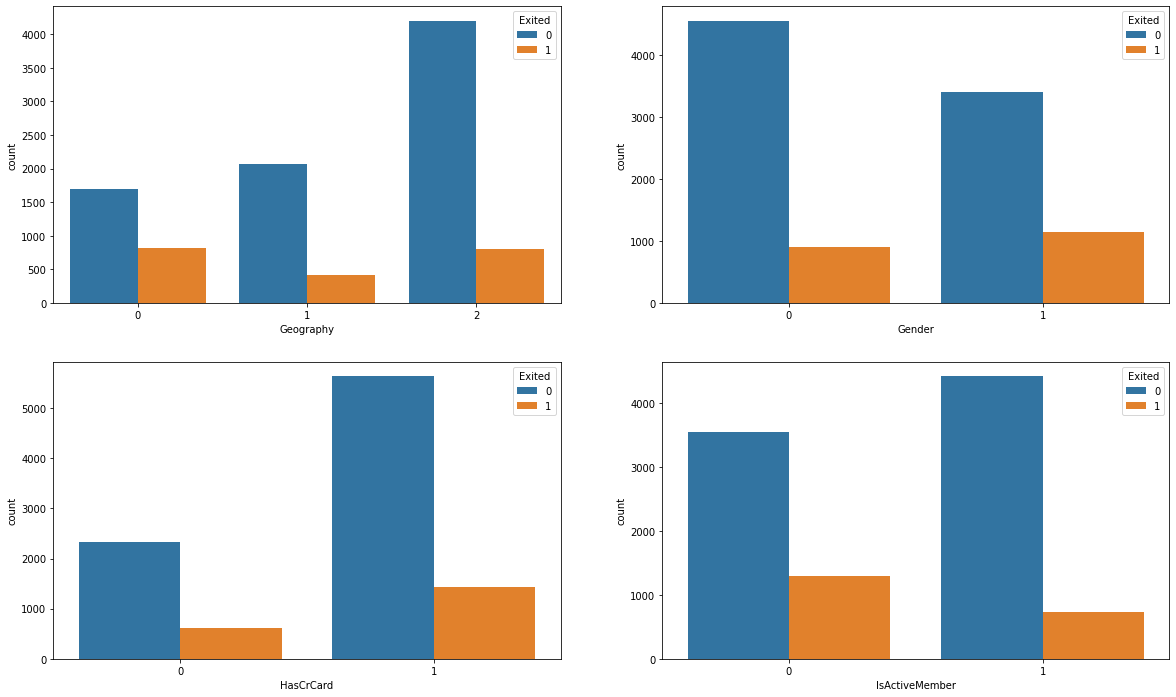

In [ ]:
import seaborn as sns
fig,axarr=plt.subplots(2,2,figsize=(20,12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

BUILD AN MODEL(ANN) IN TENSORFLOW/KERAS

In [ ]:
from sklearn.preprocessing import MinMaxScaler
colu=['CreditScore','Balance','EstimatedSalary']
sc=MinMaxScaler()
df[colu]=sc.fit_transform(df[colu])
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5191,0.664,2,1,58,1,0.000000,1,1,1,0.003475,0
8535,0.494,1,0,43,2,0.339430,1,0,1,0.025465,1
1189,0.702,2,0,40,5,0.676540,1,1,1,0.767703,1
1364,1.000,0,0,39,3,0.496413,2,1,1,0.601900,0
7571,0.736,2,0,52,8,0.316763,3,1,1,0.162064,1


In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop('Exited',axis='columns')
y=df['Exited']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5) 

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(10,),activation='relu'),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 1.2595 - accuracy: 0.6240
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5039 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4859 - accuracy: 0.7959
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4709 - accuracy: 0.7961
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4525 - accuracy: 0.8008
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4379 - accuracy: 0.8077
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4262 - accuracy: 0.8148
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4170 - accuracy: 0.8215
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4097 - accuracy: 0.8234
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4026 - accura

In [ ]:
yp = model.predict(x_test)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

Text(69.0, 0.5, 'Truth')

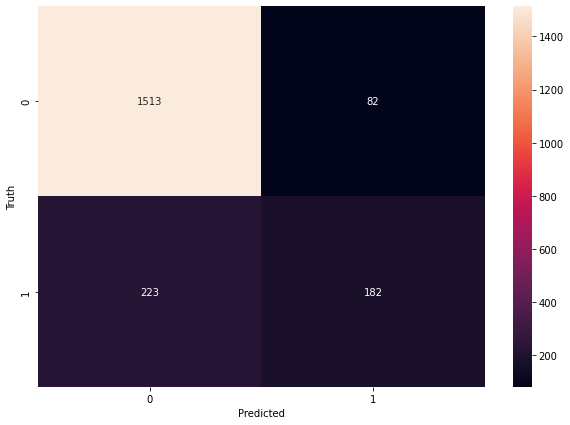

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')